# Conjunto de dados - Notas obtidas em três provas
Neste exercício, trabalharemos com o conjunto de notas obtidas por uma turma de doze alunos em três provas realizadas ao longo de um semestre letivo.

In [1]:
import pandas as pd
import numpy as np
 
# Conjunto de dados
tabela = pd.DataFrame({'Aluno':['Alisa','Bobby','Cathrine','Madonna',
                              'Rocky','Sebastian','Jaqueline','Rahul',
                              'David','Andrew','Ajay','Teresa'],
                      'P1':[62,47,55,74,31,77,85,63,42,32,71,57],
                      'P2':[89,87,67,55,47,72,76,79,44,92,99,69],
                      'P3':[56,86,77,45,73,62,74,89,71,67,97,68]})
display(tabela)

,Aluno,P1,P2,P3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqueline,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
9,Andrew,32,92,67


Quais as amplitudes, as médias, as medianas e os desvios padrão de cada prova? Qual das provas obteve a distribuição mais homogênea de notas?

In [3]:
# Construindo um novo DataFrame, coluna a coluna
''' A atribuição True ao parâmetro numeric_only garante que apenas colunas
numéricas sejam utilizadas. Para o cálculo do desvio padrão, é preciso usar
ddof=0 para informar que os dados são proveninetes de uma população (o valor
default, ddof=1, é usado para o desvio padrão amostral.''' 
est_provas =pd.DataFrame(tabela.mean(axis=0, numeric_only=True), columns=['Média'])
est_provas['Mediana'] = tabela.median(axis=0, numeric_only=True)
est_provas['DesvPad'] = tabela.std(axis=0, ddof=0, numeric_only=True)
amps = [tabela['P'+str(i)].max() - tabela['P'+str(i)].min() for i in range(1,4)]
est_provas['Amplitudes'] = amps
display(est_provas)

# Distribuição mais homogênea
print('*** Prova mais homogênea ***')
homogenea = est_provas.loc[est_provas['DesvPad'] == est_provas['DesvPad'].min()]
display(homogenea)

# Usando o método agg (nesse caso, o método std é usado com ddof=1)
print('Uso do método agg')
tabela.agg(['mean', 'std', 'median'])

,Média,Mediana,DesvPad,Amplitudes
P1,58.000000,59.5,16.703293,54
P2,73.000000,74.0,16.901676,55
P3,72.083333,72.0,13.744443,52


*** Prova mais homogênea ***


,Média,Mediana,DesvPad,Amplitudes
P3,72.083333,72.0,13.744443,52


Uso do método agg


,P1,P2,P3
mean,58.000000,73.000000,72.083333
std,17.446021,17.653225,14.355603
median,59.500000,74.000000,72.000000


Quais as médias e desvios padrão para a distribuição de provas de cada aluno? Qual o melhor aluno? Qual o mais consistente?

In [ ]:
# Médias de desvios padrão por aluno
''' É preciso usar axis=1 para o cálculo nas linhas do DataFrame.
CUIDADO: o retorno é um objeto Series, logo é preciso usasar list() para
armazenar em uma coluna de um DataFrame.'''
est_alunos = pd.DataFrame(tabela.mean(axis=1, numeric_only=True), columns=['Média'])
est_alunos.index = list(tabela['Aluno'])
est_alunos['DesvPad'] = list(tabela.std(axis=1, ddof=0, numeric_only=True))
display(est_alunos)

# Encontrando o melhor aluno
print('*** Melhor Aluno ***')
melhor = est_alunos.loc[est_alunos['Média'] == est_alunos['Média'].max()]
display(melhor)

# Encontrando o aluno mais consistente
print('*** Aluno mais consistente ***')
consistente = est_alunos.loc[est_alunos['DesvPad'] == est_alunos['DesvPad'].min()]
display(consistente)

# Média e desvio padrão de dados agrupados
**Horas semanais de estudo:** A distribuição do número
de horas semanais de estudo de uma amostra de estudantes universitários é mostrada no gráfico de pizza.
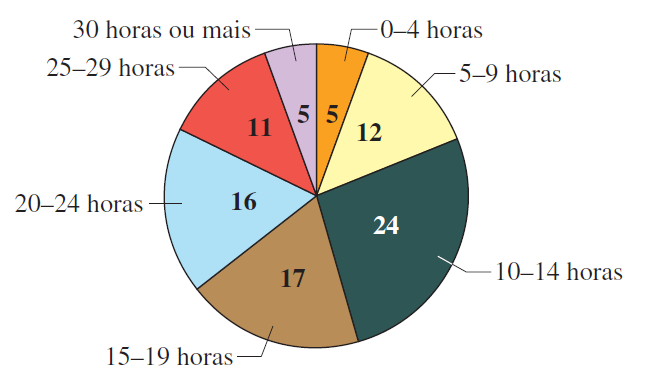

Construa uma distribuição de frequência para
os dados. A seguir, use a tabela para estimar a média e o desvio padrão amostral do conjunto de dados. Para isso, use 32 como o ponto médio para “30 horas ou mais".

In [ ]:
# Colunas iniciais da distribuição de frequência
dados = pd.DataFrame({'Classe': ['0-4', '5-9', '10-14', '15-19',
                                 '20-24', '25-29', '30 ou +'],
                      'Freq (f)': [5, 12, 24, 17, 16, 11, 5],
                      'Pt. médio (x)':[2, 7, 12, 17, 22, 27, 32]})
# Coluna valor * frequência
dados['x*f'] = dados['Freq (f)']*dados['Pt. médio (x)']
# Cálculo da média
media_dados = dados['Pt. médio (x)'].mean()
# Coluna valor - média
dados['x-xbarra'] = dados['Pt. médio (x)'] - media_dados
# Coluna (valor - média)^2
dados['(x-xbarra)^2'] = dados['x-xbarra']**2
# Coluna (valor - média)^2 * frequência
dados['(x-xbarra)^2*f'] = dados['(x-xbarra)^2']*dados['Freq (f)']
display(dados)
# Cálculo da média amostral
obs = dados['Freq (f)'].sum()
media_am = dados['x*f'].sum()/obs
print(f'Média amostral: {media_am:.1f} horas')
# Cálculo do desvio padrão amostral
desv_pam_am = (dados['(x-xbarra)^2*f'].sum()/(obs-1))**(1/2)
print(f'Desvio padrão amostral: {desv_pam_am:.1f} horas')

# Comparando dois conjuntos de dados
**Salários anuais:** Foi obtida uma amostra dos salários anuais (em milhares de dólares) para contadores recém-formados em Dallas e Nova York. Calcule o coeficiente de variação para cada
os salários de cada cidade e compare os resultados.

In [ ]:
# Conjunto de dados
salarios = pd.DataFrame({'Dallas': [41.6, 50.0, 49.5, 38.7, 39.9,
                                    45.8, 44.7, 47.8, 40.5, 44.3],
                         'New York': [45.6, 41.5, 57.6, 55.1, 59.3,
                                      59.0, 50.6, 47.2, 42.3, 51.0]})
display(salarios)

# Cálculo das médias, desvios padrão e coeficiente de variação
est_sal =pd.DataFrame(salarios.mean(axis=0, numeric_only=True), columns=['Média'])
est_sal['DesvPad'] = salarios.std(axis=0, ddof=0, numeric_only=True)
est_sal['CV'] = est_sal['DesvPad']/est_sal['Média']*100
display(est_sal)